# **Global Electronics Data Analysis** 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

sales = pd.read_csv('./DataSet/Sales.csv')
customer = pd.read_csv('./DataSet/Customers.csv', encoding= 'unicode_escape')
store = pd.read_csv('./DataSet/Stores.csv')
product = pd.read_csv('./DataSet/Products.csv')
exchange_rate = pd.read_csv('./DataSet/Exchange_Rates.csv')



# Data Preprocessing 


# Customer (Data Preprocessing) 

In [4]:
# convert birthday to datetime 
customer['Birthday'] = pd.to_datetime(customer['Birthday'], errors='coerce').dt.date
customer.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [5]:
# checking missing values
customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [6]:
# check the data types
customer.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [7]:
# drop the columns as they dont required
customer.drop(['State Code','Zip Code'], axis=1, inplace=True)

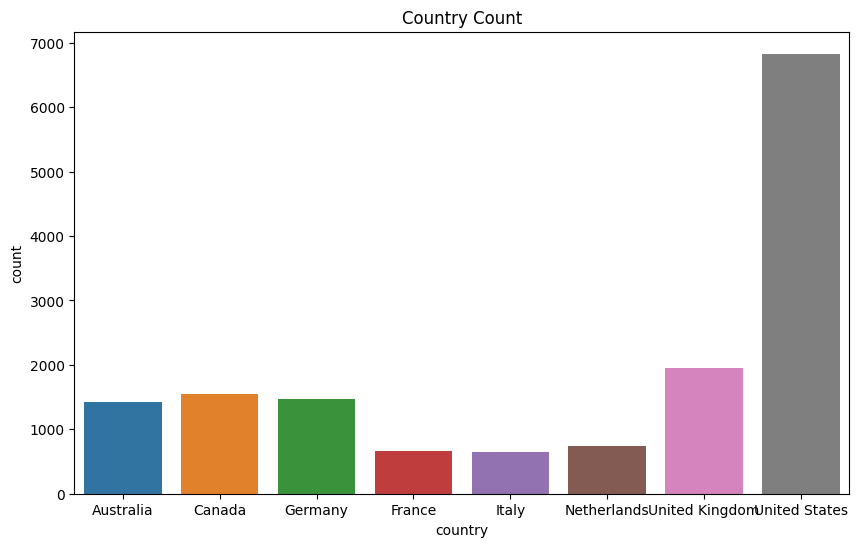

In [8]:
# visualize the country 
plt.figure(figsize=(10, 6))
sns.countplot(x=customer['Country'],hue=customer['Country'])
plt.title("Country Count")
plt.xlabel("country")
plt.ylabel('count')
plt.show()

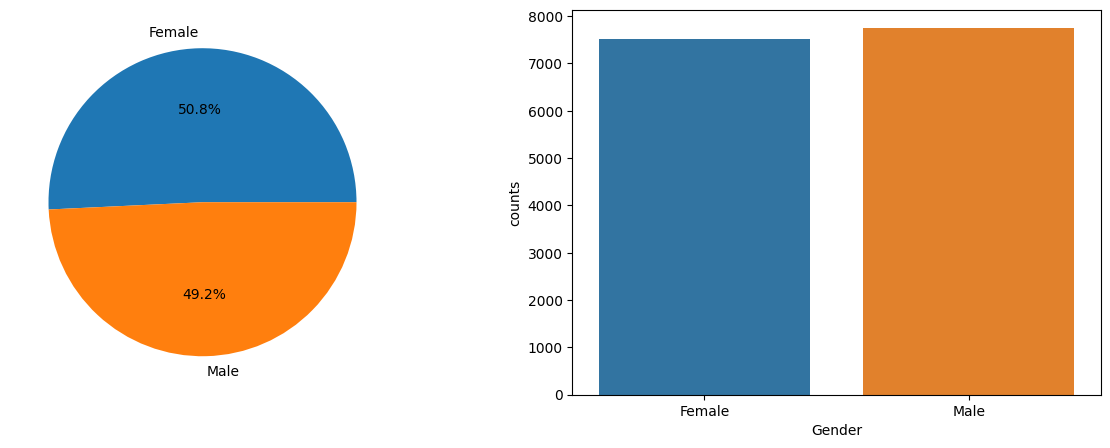

In [9]:
# visualize the gender details
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(customer['Gender'].value_counts(),  labels=customer['Gender'].unique(), autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x=customer['Gender'],hue=customer['Gender'])
plt.xlabel('Gender')
plt.ylabel('counts')
plt.show()

# Store (Data Proprocessing)

In [10]:
store.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [11]:
store['Open Date'] = pd.to_datetime(store['Open Date'], errors='coerce').dt.date

In [12]:
# null values
store.isnull().sum()


StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [13]:
# fill the missing values
store['Square Meters'] = store['Square Meters'].fillna(0)

In [14]:
store.dtypes

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object

In [15]:
store.tail()

,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01
66,0,Online,Online,0.0,2010-01-01


In [16]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  67 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


# Product (Data Preprocessing)

In [17]:
product.isnull().sum() # no null values 

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [18]:
product['Unit Cost USD'] = product['Unit Cost USD'].str.replace('$','').str.replace(',','')
product['Unit Cost USD'] = product['Unit Cost USD'].astype(float)

product['Unit Price USD']  = product['Unit Price USD'].str.replace('$','').str.replace(',','')
product['Unit Price USD']  = product['Unit Price USD'].astype(float)

In [19]:
product.dtypes

ProductKey          int64
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
SubcategoryKey      int64
Subcategory        object
CategoryKey         int64
Category           object
dtype: object

In [20]:
# drop the subcategoryKey 
product.drop(columns='SubcategoryKey', axis=1, inplace=True)

In [21]:
product.head(2)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,MP4&MP3,1,Audio


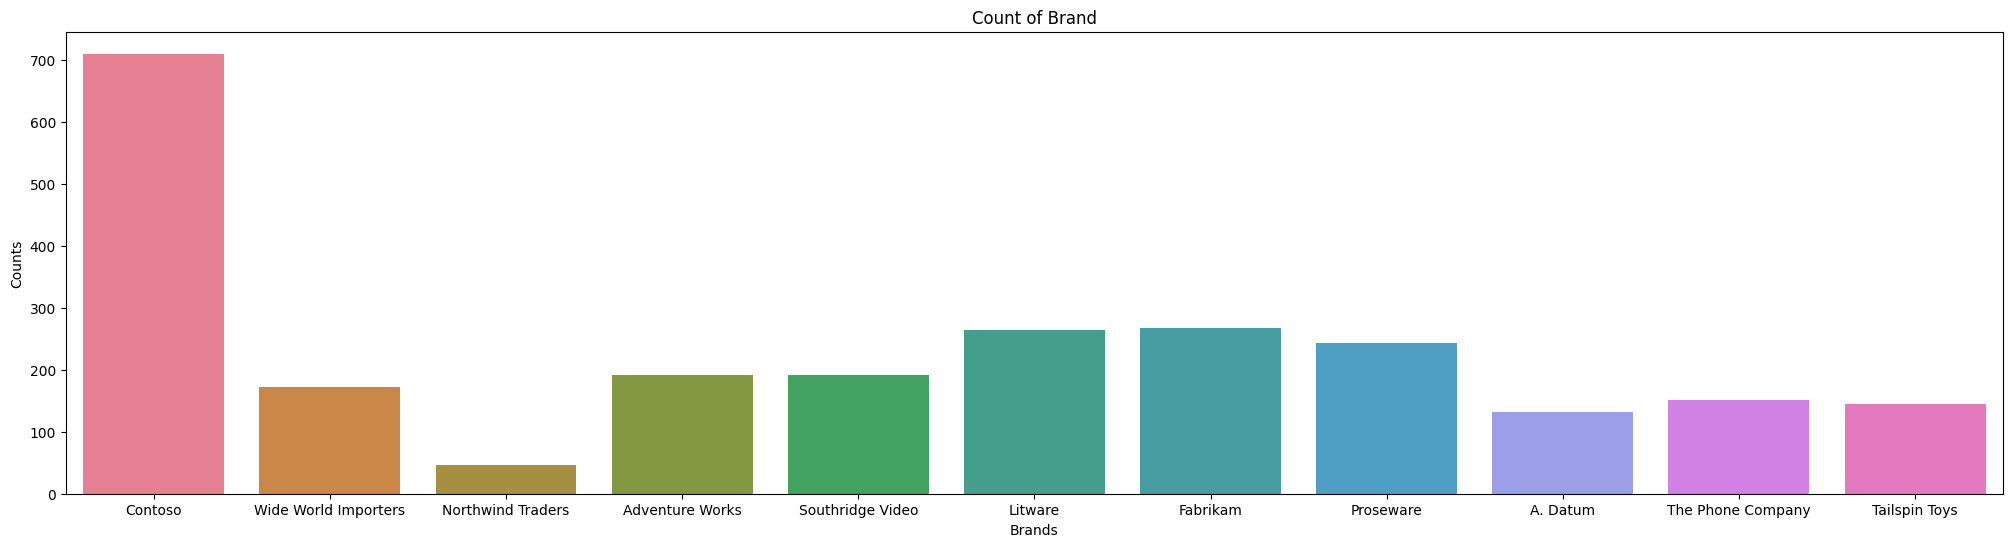

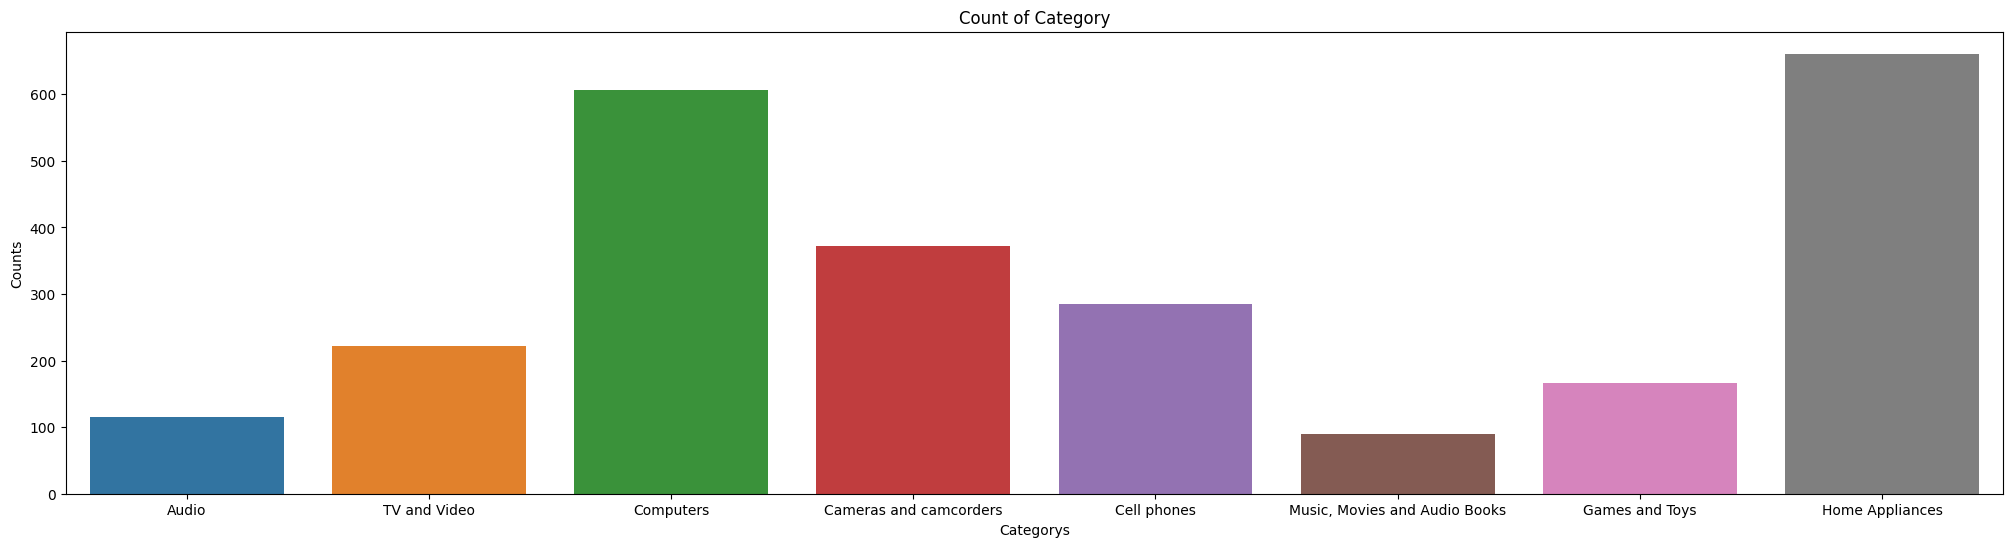

In [22]:
# visualize the brand and category count
plt.figure(figsize=(25, 6))
sns.countplot(data=product, x='Brand', hue='Brand')
plt.title("Count of Brand")
plt.xlabel("Brands")
plt.ylabel("Counts")
plt.figure(figsize=(25, 6))
sns.countplot(data=product, x='Category', hue='Category')
plt.title("Count of Category")
plt.xlabel("Categorys")
plt.ylabel("Counts")
plt.show()


# Exchange Rate (Data Preprocessing)

In [23]:
# rename the currency column
exchange_rate.rename(columns={'Currency': 'Currency Code'}, inplace=True)
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'], errors='coerce').dt.date

In [24]:
exchange_rate.dtypes

Date              object
Currency Code     object
Exchange         float64
dtype: object

In [25]:
exchange_rate.isnull().sum()

Date             0
Currency Code    0
Exchange         0
dtype: int64

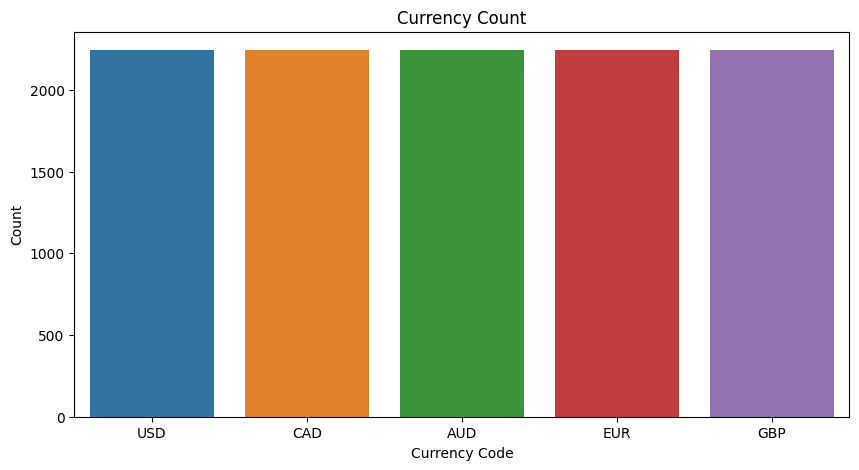

In [26]:
# visualize the currency count
plt.figure(figsize=(10, 5))
sns.countplot(x=exchange_rate['Currency Code'], hue=exchange_rate['Currency Code'])
plt.title("Currency Count")
plt.xlabel("Currency Code")
plt.ylabel("Count")
plt.show()

# Sales


In [27]:
sales = pd.read_csv("./DataSet/Sales.csv")

In [28]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [29]:
# check the null values
sales.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [31]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'], errors='coerce')

#  Load Preprocessed data into MYSQL

In [35]:
import mysql.connector
from mysql.connector import Error
from time import sleep

db_name = "global_electronic"
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Venu@#06'
    )


if conn.is_connected():
    cursor = conn.cursor()
    print('Connected to MySQL Database')
    print(f"Checking the {db_name} is Exist..")
    sleep(.2)
    
    cursor.execute("select SCHEMA_NAME FROM INFORMATION_SCHEMA.SCHEMATA WHERE SCHEMA_NAME = 'global_electronic' ")
    
    # cursor.execute("show databases like 'global_electronic' ")
    exist = cursor.fetchone()
    if exist is None:
        print(f"{db_name} not exist! \n")
        print(f"Creating the {db_name} Database..")
        sleep(.2)
        cursor.execute(f"CREATE DATABASE {db_name}")
        conn.commit()
        conn.database = db_name
        sleep(.1)
        print(f"{db_name} created")
    else:
        conn.database = db_name
        print(f"{db_name} already exist")
        


Connected to MySQL Database
Checking the global_electronic is Exist..
global_electronic already exist


In [33]:
# insert the customer data

Query = """Insert into customer (
    customerkey, 
    gender,
    name,
    city,
    state,country,
    continent,
    birthday) 
    values (%s,%s,%s,%s,%s,%s,%s,%s)
"""

data = list(customer.itertuples(index=False, name=None))

# insert
cursor.executemany(Query, data)
print(cursor.lastrowid)
conn.commit()

NameError: name 'cursor' is not defined

In [ ]:
# Insert the Store data
Query = """Insert into store (
    storekey, 
    country,
    state,
    square_meters,
    open_date) 
    values (%s,%s,%s,%s,%s)"""


data = list(store.itertuples(index=False, name=None))

cursor.executemany(Query, data)
print(cursor.lastrowid)
conn.commit()

In [ ]:
# insert the product data
Query = """Insert into product (
    productkey, 
    product_name,
    brand,
    color, 
    unit_cost_usd, 
    unit_price_usd, 
    subcategory, 
    categorykey, 
    category) values (%s,%s,%s,%s,%s,%s,%s,%s,%s)"""

data = [tuple(row) for row in product.to_numpy()]

cursor.executemany(Query, data)
print(cursor.lastrowid)
conn.commit()

In [ ]:
# insert the  exchange rate data
Query = """Insert into exchange_rate (
    date_,
    currency_code,
    exchange) 
    values (%s,%s,%s)"""



data = list(exchange_rate.itertuples(index=False, name=None))

cursor.executemany(Query, data)
print(cursor.lastrowid)
conn.commit()



In [ ]:
# Insert the Sales data
Query = """Insert into sales (
    order_id,
    line_item,
    order_date, 
    delivery_date, 
    customerkey,
    storekey,
    productkey, 
    quantity,   
    currency_code)
    values (%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
    
data = list(sales.itertuples(index=False, name=None))

cursor.executemany(Query, data)
print(cursor.lastrowid)
conn.commit()

0


In [40]:
cursor.execute("""
               select 
                  (s.quantity * p.unit_price_usd * ex.exchange) as totalRevenuewithexchange
               from sales s join product p on s.productkey = p.productkey
               join exchange_rate ex on s.order_date = ex.date_ and s.currency_code = ex.currency_code
               order by totalRevenuewithexchange desc
               """)
row = cursor.fetchall()
print(row[:10])

[(Decimal('36630.925528'),), (Decimal('34662.291680'),), (Decimal('32519.578376'),), (Decimal('32226.390000'),), (Decimal('31999.900000'),), (Decimal('31744.797000'),), (Decimal('28999.900000'),), (Decimal('28999.900000'),), (Decimal('28799.910000'),), (Decimal('28799.910000'),)]
